In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [11]:
xtc_file = r"eq_npt_pbc.xtc"
pdb_file = r"eq_npt.pdb"
output_file = w"output_file.txt"


trajectory = md.load(xtc_file, top=pdb_file, stride=1)
print(trajectory)
n_frames = len(trajectory)
print(n_frames)

SyntaxError: invalid syntax (<ipython-input-11-49e5adee195b>, line 3)

In [3]:
slab = trajectory.topology.select('resname GOX')
sol = trajectory.topology.select('all and not resname GOX')
print(len(slab))
print(len(sol))

601
12069


In [4]:
hbonds =md.baker_hubbard(trajectory[1],exclude_water=False)
print(hbonds)
print(len(hbonds))

[[  601   602  5206]
 [  601   603  1246]
 [  604   605  5236]
 ...
 [12661 12663 10600]
 [12664 12666  3472]
 [12667 12668  5293]]
7262


In [26]:
slab = trajectory.topology.select('resname GOX')
sol = trajectory.topology.select('all and not resname GOX')
print(len(slab))
print(len(sol))

601
12069


In [7]:
all_hbonds_set = set()
hbonds_each_frame = []
# We want to create a dictionary containing every frame and the hbonds which occur in that frame
Frame2hbond = {}
for frame in range(n_frames):
    Frame2hbond[frame] = [] 
    hbonds = md.baker_hubbard(trajectory[frame],exclude_water=False)
    hbonds_each_frame.append(hbonds)
    for hbond in hbonds:
        if ((hbond[0] in slab) and (hbond[2] in sol) or
            (hbond[2] in slab) and (hbond[0] in sol)):             
            all_hbonds_set.add(tuple(hbond))
            Frame2hbond[frame].append(tuple(hbond))  

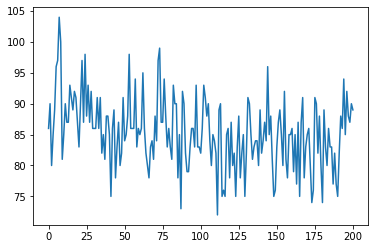

In [12]:
x = [] # these are all the frames
y = [] # this is the total number of hbonds in that frame 
for frame in Frame2hbond:
    x.append(frame)
    y.append((len(Frame2hbond[frame])))

    
plt.plot(x,y)
plt.savefig('figure_name.png')
plt.show()

In [13]:
with open("mdtraj-result.csv", "w") as out_file:
    for i in range(len(x)):
        out_file.write("%i %5.2f\n" % (x[i],  y[i]))    

<ipython-input-25-4a82134907aa>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


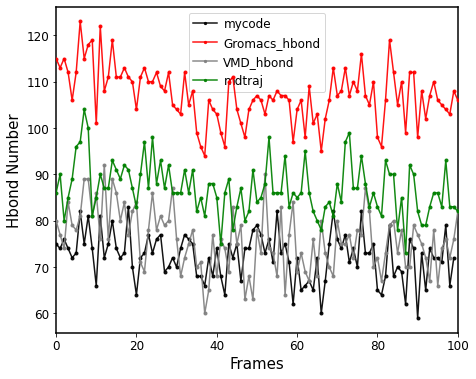

In [25]:
import pylab
from pylab import *
fig = plt.figure(figsize=(1.2*6,6)) 


data1 = np.genfromtxt((r for r in open('myfile.csv') if not r[0] in ('@', '#', '&')))
frame1 = data1.T[0]  # time in ps
hbond1 = data1.T[1]

data2 = np.genfromtxt((r for r in open('GOX/hbon-sol-surface-gromacs.xvg') if not r[0] in ('@', '#', '&')))
frame2 = data2.T[0]  # time in ps
hbond2 = data2.T[1]


data3 = np.genfromtxt((r for r in open('GOX/hbond-sol-surface-vmd.dat') if not r[0] in ('@', '#', '&')))
frame3 = data3.T[0]  # time in ps
hbond3 = data3.T[1]


data4 = np.genfromtxt((r for r in open('mdtraj-result.csv') if not r[0] in ('@', '#', '&')))
frame4 = data4.T[0]  # time in ps
hbond4 = data4.T[1]

# make a plot of Potential energy vs simulation steps
#plt.plot(x_val,y_val, marker='.', color='black', linestyle='-', lw=1.5, zorder = 500,
   #      markeredgewidth=1, alpha=0.92, label='Mycode')
plt.plot(frame1,hbond1, marker='.', color='black', linestyle='-', lw=1.5, zorder = 500,
         markeredgewidth=1, alpha=0.92, label='mycode')
plt.plot(frame2,hbond2, marker='.', color='red', linestyle='-', lw=1.5, zorder = 500,
         markeredgewidth=1, alpha=0.92, label='Gromacs_hbond')
plt.plot(frame3,hbond3, marker='.', color='gray', linestyle='-', lw=1.5, zorder = 500,
         markeredgewidth=1, alpha=0.92, label='VMD_hbond')
plt.plot(frame4,hbond4, marker='.', color='green', linestyle='-', lw=1.5, zorder = 500,
         markeredgewidth=1, alpha=0.92, label='mdtraj')



xlabel('Frames', size=15)
ylabel('Hbond Number', size=15)
pylab.yticks(fontsize=12)
pylab.xticks(fontsize=12)


plt.legend(loc='best', ncol=1, columnspacing=2, handletextpad=0.5,
           fancybox=True, numpoints=1, markerscale=0.75, fontsize=12).set_alpha(0.5)


pylab.xlim([0,100])


ax = fig.add_subplot(111)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

pylab.savefig('mdtraj-SOL-surface-GOX.png', format='png', bbox_inches='tight')
plt.show()